In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

_Review target variable._

In [2]:
raw_df = pd.read_csv('data/employee_data.csv')

In [3]:
raw_df.status.unique()

array(['Left', 'Employed'], dtype=object)

In [4]:
abt_df = pd.read_csv('data/analytical_base_table.csv')

In [5]:
abt_df.status.unique()

array([1, 0], dtype=int64)

_Noisy Conditional for Logistic Regression example_

In [6]:
#input feature
x = np.linspace(0,1,100)

np.random.seed(555)
noise = np.random.uniform(-0.2, 0.2, 100)

#target variable
y = ((x + noise) > 0.5).astype(int)

In [7]:
print(x.shape)
print(y.shape)
print(noise.shape)

(100,)
(100,)
(100,)


_Reshape_ `'x'` _since_ `'sklearn'` _expects input features with 2 variables._

In [8]:
X = x.reshape(100,1)

In [9]:
print(x[:5])
print()
print(X[:5])

[ 0.          0.01010101  0.02020202  0.03030303  0.04040404]

[[ 0.        ]
 [ 0.01010101]
 [ 0.02020202]
 [ 0.03030303]
 [ 0.04040404]]


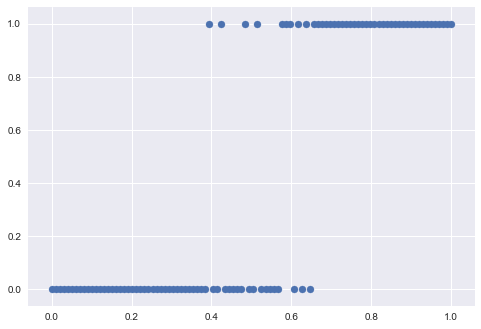

In [11]:
plt.scatter(X , y)
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression, LogisticRegression

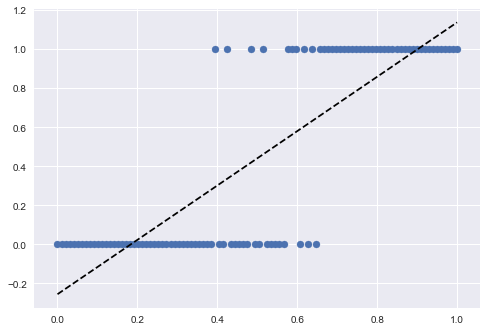

In [13]:
model = LinearRegression()
model.fit(X , y)

plt.scatter(X , y)
plt.plot(X, model.predict(X), 'k--')
plt.show()

In [14]:
model_log = LogisticRegression()
model_log.fit(X , y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
print(model_log.predict(X))
print()

pred = model_log.predict_proba(X[:10])

print(pred)
print()
print(pred[0][1])
print()

pred_even = [p[1] for p in pred]
pred_even

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

[[ 0.89323552  0.10676448]
 [ 0.88947376  0.11052624]
 [ 0.88559644  0.11440356]
 [ 0.88160121  0.11839879]
 [ 0.87748575  0.12251425]
 [ 0.87324782  0.12675218]
 [ 0.86888519  0.13111481]
 [ 0.86439572  0.13560428]
 [ 0.85977734  0.14022266]
 [ 0.85502804  0.14497196]]

0.106764482641



[0.10676448264067613,
 0.11052623680433005,
 0.11440355742582128,
 0.11839879099901449,
 0.12251424555610411,
 0.12675218324295856,
 0.1311148125280929,
 0.13560428005260655,
 0.14022266213141368,
 0.14497195591931389]

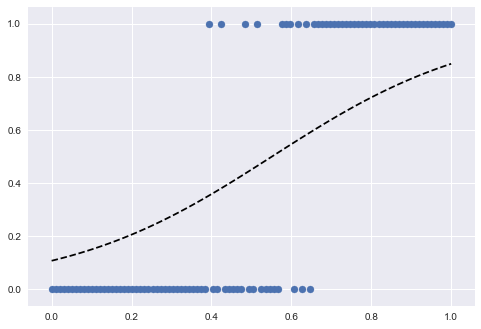

In [26]:
pred = model_log.predict_proba(X)
pred_even = [p[1] for p in pred]

plt.scatter(X , y)
plt.plot(X, pred_even, 'k--')
plt.show()

In [27]:
def fit_and_plot_classifier(clf):
    #fit model
    clf.fit(X , y)
    
    #predict and take second value of each prediction
    pred = clf.predict_proba(X)
    pred = [p[1] for p in pred]
    
    #plot
    plt.scatter(X , y)
    plt.plot(X , pred , 'k--')
    plt.show()
    
    #return fitted model and predictions
    return clf, pred

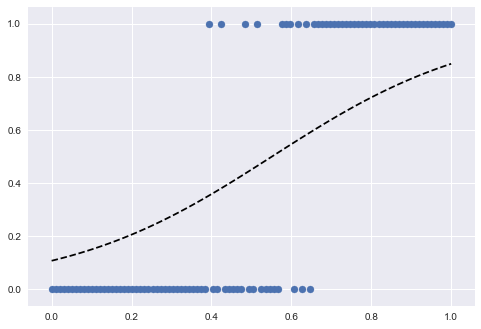

In [28]:
clf, pred = fit_and_plot_classifier(LogisticRegression())

`'LogisticRegression'` _in_ `'sklearn'` _is regularized by default, so the regularization strength must be tuned._

_Not_ `'alpha'` _as in Lasso, Ridge, and ElasticNet, but_ `'C'` _in_ `'LogisticRegression'` _--the __inverse of the regularization strength__ (e.g, higher_ `'C'` _means a weaker penalty, and lower_ `'C'` _means a stronger penalty._

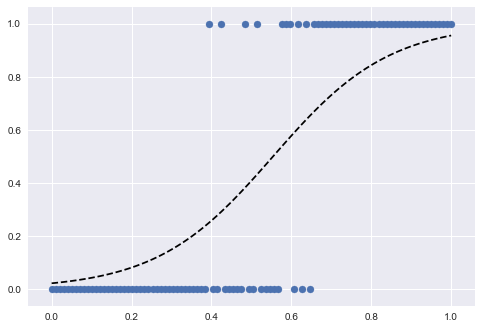

In [29]:
clf, pred = fit_and_plot_classifier(LogisticRegression(C=4))

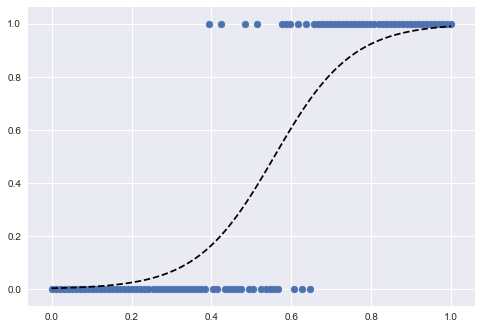

In [32]:
clf, pred = fit_and_plot_classifier(LogisticRegression(C=16))

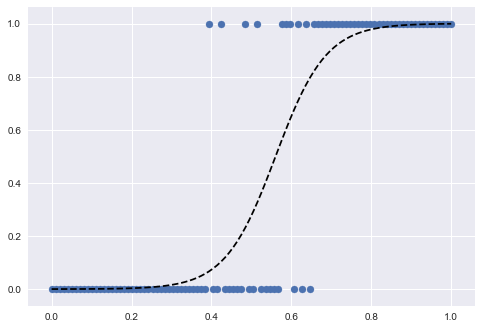

In [33]:
clf, pred = fit_and_plot_classifier(LogisticRegression(C=1000))

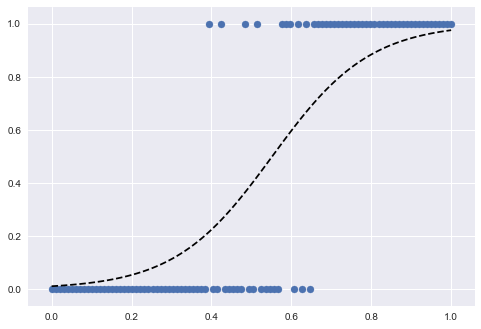

In [35]:
clf, pred = fit_and_plot_classifier(LogisticRegression(penalty='l1'))

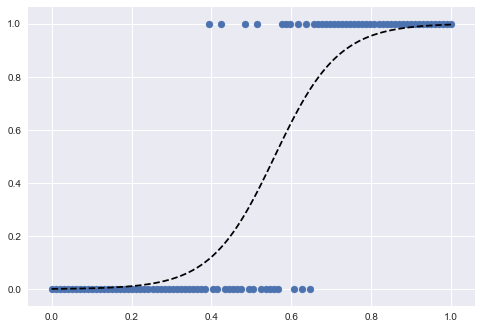

In [37]:
clf, pred = fit_and_plot_classifier(LogisticRegression(penalty = 'l1', C = 4))

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

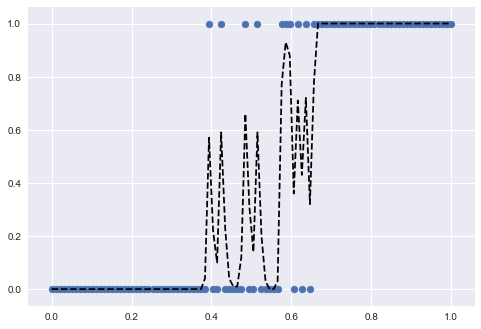

In [41]:
clf, pred = fit_and_plot_classifier(RandomForestClassifier(n_estimators = 100))

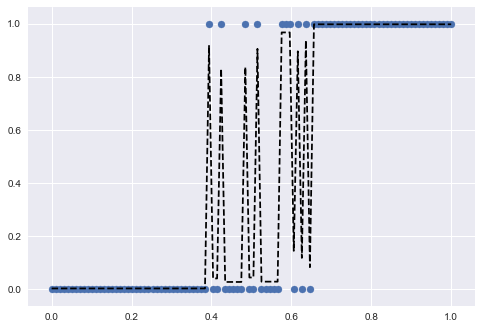

In [42]:
clf, pred = fit_and_plot_classifier(GradientBoostingClassifier(n_estimators = 100))